In [30]:
# Dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("crypto_data.csv")
data

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [31]:
# Filtering data frame for only currently trading
cur_trad = data[data['IsTrading']==True]
cur_trad

# Dropping rows with any NA values
crypto_df = cur_trad.dropna()
crypto_df

# Filtering for only crypto that has been mined
crypto_df = crypto_df[crypto_df['TotalCoinsMined']>0]
crypto_df

# Removing CoinName since it is not a feature that would be meaningful for a model/analysis
crypto_df = crypto_df.drop('CoinName',axis=1)
crypto_df

# Creating dummy variables for categorical fields
dummy_fields = ['Algorithm', 'ProofType']
crypto_df = pd.get_dummies(data=crypto_df[dummy_fields])
# crypto_df = pd.get_dummies(data=crypto_df['ProofType'])
crypto_df

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Scale the data
crypto_df_scl = StandardScaler().fit_transform(crypto_df)

In [32]:
 # Initialize PCA model
pca = PCA(n_components=0.90)

# Get principal components for the crypto data
crypto_pca = pca.fit_transform(crypto_df_scl)
crypto_pca

 # Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(data=crypto_pca)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1.016473,-0.688640,-1.683422e-15,1.027197e-15,-1.206092e-15,-9.193752e-14,-1.245210e-16,-0.763649,-1.064349,-0.342228,...,-1.853800e-15,-1.403160e-15,-2.383445e-15,2.615910e-16,2.523894e-15,4.622880e-15,-2.333403e-15,1.306563e-14,4.005613e-15,8.323568e-15
1,1.016473,-0.688640,-5.974984e-16,1.476626e-15,-1.034897e-15,-9.217601e-14,-9.408006e-16,-0.763649,-1.064349,-0.342228,...,-1.098921e-15,-1.875763e-16,-1.796739e-15,7.455374e-16,1.818947e-15,4.246303e-15,-3.200335e-15,1.274564e-14,2.135067e-15,8.084506e-15
2,1.790646,-0.745815,-4.239566e-14,-7.364801e-16,-6.513117e-16,-9.993580e-14,-1.937022e-15,-0.673741,-0.789218,-0.251182,...,1.656656e-14,4.528422e-14,7.094495e-14,2.289615e-14,-4.272186e-14,-3.624395e-14,-8.264790e-14,-1.433043e-13,-4.446350e-14,-1.887234e-13
3,-1.323049,0.226531,-1.532676e-15,-2.558319e-16,-4.876399e-17,2.510190e-14,-6.168461e-16,0.224969,0.090717,0.079007,...,-2.139371e-15,1.209042e-14,1.055323e-14,4.305073e-15,-5.914512e-15,-1.059115e-14,-2.758334e-14,-1.045447e-14,-1.194279e-14,-4.812261e-14
4,-2.038382,0.443387,7.191351e-15,2.153103e-15,1.527554e-15,5.966647e-14,6.324920e-16,0.271425,0.351418,0.181134,...,-4.689774e-15,7.112448e-14,-7.512739e-14,4.743090e-15,4.736884e-14,-4.939799e-14,-2.034055e-13,1.217058e-13,-6.290691e-14,-4.479354e-13


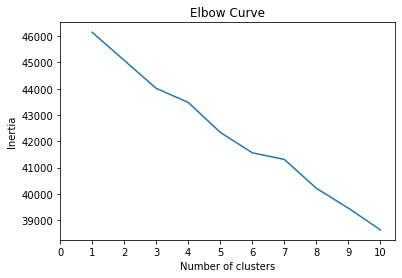

In [33]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=28)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()